In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('database playstore/googleplaystore.csv')

# Discovery

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.shape

(10841, 13)

In [5]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [9]:
# cercherò di capire se ci sono spazi nel mercato delle app
# forse in alcune categorie non ci sono app con valutazioni alte, 
# oppure ci sono poche app

In [10]:
# toglierò le ultime due colonne perchè non sono utili alla mia analisi
# toglierò la colonna Reviews perchè c'è già la colonna Installs, 
# e per la mia analisi si equivalgono
# infine toglierò la colonna Size perchè con il progresso tecnologico non è più un problema

# Data Selection e Data Cleaning

In [11]:
# iniziamo facendo data cleaning, vogliamo i dati di tipo numerico e 
# vogliamo togliere dati inseriti male

In [12]:
df = df.drop(['Current Ver', 'Android Ver', 'Reviews', 'Size'], axis=1)

In [13]:
df.groupby(['Category']).mean().round(2)

,Rating
Category,
1.9,19.00
ART_AND_DESIGN,4.36
AUTO_AND_VEHICLES,4.19
BEAUTY,4.28
BOOKS_AND_REFERENCE,4.35
BUSINESS,4.12
COMICS,4.16
COMMUNICATION,4.16
DATING,3.97


In [14]:
df = df.drop(df.loc[df["Category"] =='1.9'].index)

In [15]:
df['Installs'] = df['Installs'].str.replace('+','')
df['Installs'] = df['Installs'].str.replace(',','')

/tmp/ipykernel_46835/1670448764.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace('+','')


In [16]:
df = df.astype({'Installs': 'int32'})

In [17]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

# Data Exploration e Data Transformation

In [18]:
# iniziamo ad esplorare ed analizzare i dati

In [19]:
df.head()

,App,Category,Rating,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,10000,Free,0,Everyone,Art & Design,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,5000000,Free,0,Everyone,Art & Design,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,50000000,Free,0,Teen,Art & Design,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Installs        10840 non-null  int32         
 4   Type            10839 non-null  object        
 5   Price           10840 non-null  object        
 6   Content Rating  10840 non-null  object        
 7   Genres          10840 non-null  object        
 8   Last Updated    10840 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int32(1), object(6)
memory usage: 804.5+ KB


In [21]:
correlation = df.corr()

In [22]:
# abbiamo visto che il rating ha correlazione positiva con il numero dei download
# andiamo quindi a cercare le categorie con pochi download e basso rating

In [23]:
cat_group = df.groupby('Category').Rating.mean()
cat_group

Category
ART_AND_DESIGN         4.358065
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.346067
BUSINESS               4.121452
COMICS                 4.155172
COMMUNICATION          4.158537
DATING                 3.970769
EDUCATION              4.389032
ENTERTAINMENT          4.126174
EVENTS                 4.435556
FAMILY                 4.192272
FINANCE                4.131889
FOOD_AND_DRINK         4.166972
GAME                   4.286326
HEALTH_AND_FITNESS     4.277104
HOUSE_AND_HOME         4.197368
LIBRARIES_AND_DEMO     4.178462
LIFESTYLE              4.094904
MAPS_AND_NAVIGATION    4.051613
MEDICAL                4.189143
NEWS_AND_MAGAZINES     4.132189
PARENTING              4.300000
PERSONALIZATION        4.335987
PHOTOGRAPHY            4.192114
PRODUCTIVITY           4.211396
SHOPPING               4.259664
SOCIAL                 4.255598
SPORTS                 4.223511
TOOLS                  4.047411
TRAVEL_AND_LOCAL       4.109292

In [24]:
cat_group = df.groupby('Category')
cat_group = cat_group.filter(lambda x: x['Rating'].mean() < 4.2)
cat_group

,App,Category,Rating,Installs,Type,Price,Content Rating,Genres,Last Updated
49,Monster Truck Stunt 3D 2019,AUTO_AND_VEHICLES,4.2,100000,Free,0,Everyone,Auto & Vehicles,2018-05-10
50,Real Tractor Farming,AUTO_AND_VEHICLES,4.0,1000000,Free,0,Everyone,Auto & Vehicles,2018-07-26
51,Ultimate F1 Racing Championship,AUTO_AND_VEHICLES,3.8,100000,Free,0,Everyone,Auto & Vehicles,2018-07-26
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,1000000,Free,0,Everyone,Auto & Vehicles,2018-07-30
53,American Muscle Car Race,AUTO_AND_VEHICLES,3.9,100000,Free,0,Everyone,Auto & Vehicles,2018-07-26
...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,NaN,10,Free,0,Everyone,Business,2016-09-29
10836,Sya9a Maroc - FR,FAMILY,4.5,5000,Free,0,Everyone,Education,2017-07-25
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,100,Free,0,Everyone,Education,2018-07-06
10838,Parkinson Exercices FR,MEDICAL,NaN,1000,Free,0,Everyone,Medical,2017-01-20


In [25]:
cat_group.groupby('Category').Rating.mean()

Category
AUTO_AND_VEHICLES      4.190411
BUSINESS               4.121452
COMICS                 4.155172
COMMUNICATION          4.158537
DATING                 3.970769
ENTERTAINMENT          4.126174
FAMILY                 4.192272
FINANCE                4.131889
FOOD_AND_DRINK         4.166972
HOUSE_AND_HOME         4.197368
LIBRARIES_AND_DEMO     4.178462
LIFESTYLE              4.094904
MAPS_AND_NAVIGATION    4.051613
MEDICAL                4.189143
NEWS_AND_MAGAZINES     4.132189
PHOTOGRAPHY            4.192114
TOOLS                  4.047411
TRAVEL_AND_LOCAL       4.109292
VIDEO_PLAYERS          4.063750
Name: Rating, dtype: float64

In [26]:
genres_group = df.groupby('Genres')
genres_group = genres_group.filter(lambda x: x['Rating'].mean() < 4.0)
genres_group['Genres'].value_counts()

Dating                                 234
Educational                             37
Parenting;Education                      7
Educational;Creativity                   5
Art & Design;Pretend Play                2
Parenting;Brain Games                    1
Health & Fitness;Action & Adventure      1
Name: Genres, dtype: int64

In [27]:
genres_group.groupby('Genres').Rating.mean()

Genres
Art & Design;Pretend Play              3.900000
Dating                                 3.970769
Educational                            3.871875
Educational;Creativity                 3.960000
Health & Fitness;Action & Adventure    3.900000
Parenting;Brain Games                  3.800000
Parenting;Education                    3.866667
Name: Rating, dtype: float64

In [28]:
# credo che la migliore opzione sia continuare considerando i sette generi della cella sopra
# però senza la categoria dating che è satura

In [29]:
genres_low_rat = ['Art & Design;Pretend Play', 'Educational', 'Educational;Creativity', 'Health & Fitness;Action & Adventure', 'Parenting;Brain Games', 'Parenting;Education']
mask = df['Genres'].isin(genres_low_rat)

In [30]:
low_rat_df = df[mask]
low_rat_df = low_rat_df.dropna(subset='Rating')

In [31]:
# ho tolto le app senza rating perchè è un valore fondamentale

In [32]:
low_rat_df = low_rat_df.reset_index()

In [33]:
low_rat_df = low_rat_df.drop(['index'], axis=1)

In [34]:
low_rat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             44 non-null     object        
 1   Category        44 non-null     object        
 2   Rating          44 non-null     float64       
 3   Installs        44 non-null     int32         
 4   Type            44 non-null     object        
 5   Price           44 non-null     object        
 6   Content Rating  44 non-null     object        
 7   Genres          44 non-null     object        
 8   Last Updated    44 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int32(1), object(6)
memory usage: 3.0+ KB


In [35]:
low_rat_df.groupby('Genres').App.count()

Genres
Art & Design;Pretend Play               2
Educational                            32
Educational;Creativity                  5
Health & Fitness;Action & Adventure     1
Parenting;Brain Games                   1
Parenting;Education                     3
Name: App, dtype: int64

In [36]:
# vediamo che tra i pochi risultati rimasti, ci sono buone prospettive se lanciassimo
# sul mercato un'app di educazione o di genitorialità (parenting),
# meglio ancora unendo i due generi.

In [37]:
df_viz = low_rat_df[['Genres', 'Rating']]
df_viz

,Genres,Rating
0,Art & Design;Pretend Play,3.9
1,Educational;Creativity,4.4
2,Art & Design;Pretend Play,3.9
3,Educational;Creativity,4.2
4,Educational;Creativity,3.0
5,Parenting;Brain Games,3.8
6,Parenting;Education,4.0
7,Parenting;Education,3.7
8,Parenting;Education,3.9
9,Health & Fitness;Action & Adventure,3.9


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Art & Design;Pretend Play'),
  Text(1, 0, 'Educational;Creativity'),
  Text(2, 0, 'Parenting;Brain Games'),
  Text(3, 0, 'Parenting;Education'),
  Text(4, 0, 'Health & Fitness;Action & Adventure'),
  Text(5, 0, 'Educational')])

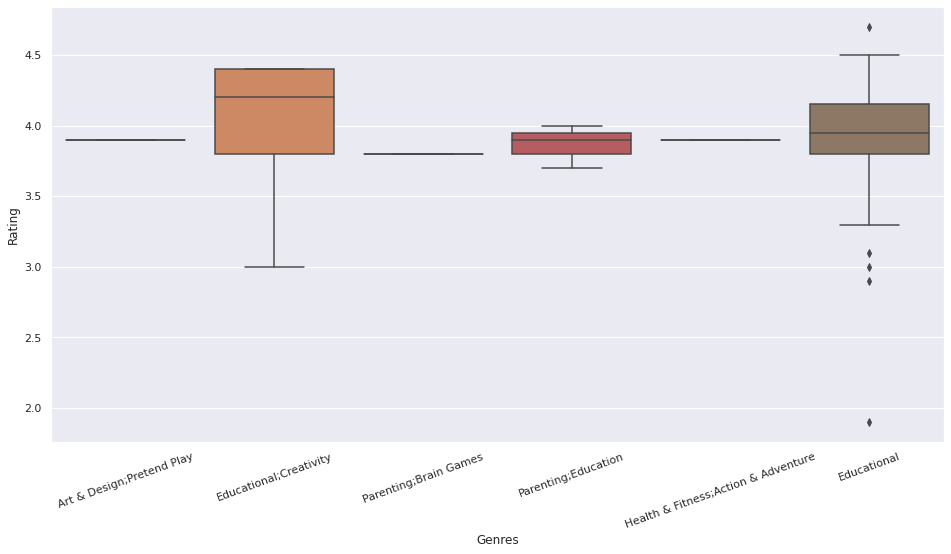

In [40]:
sns.boxplot(x = 'Genres', y = 'Rating', data = df_viz) 
sns.set(rc={'figure.figsize':(16,8)})
plt.xticks(rotation=20)

In [39]:
# anche visualizzando usando i boxplot, rimane chiaro che il genere 'parenting;education'
# sia il migliore su cui puntare